# Fine Food Review

Assignment for Swisscom interview<br>
Ludovic Herbelin, 2020

**Goals : Predict review score from the text of the review.**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn

## Loading data

In [14]:
DATASET_PATH = 'Reviews.csv'

df = pd.read_csv(DATASET_PATH)

print(len(df))

568454


In [15]:
df = df.drop(columns=['ProductId', 'UserId', 'ProfileName', 'Time'])

df.head()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [30]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
   
ps = PorterStemmer() 
stop_words = set(stopwords.words('english'))  

def __stem_word__(word):
    return ps.stem(word)

def __tokenize_text__(text):
    return word_tokenize(text)

def preproces_text(text, stopwords):
    words = __tokenize_text__(text)
    # set words to lowercase and remove punctuation
    words = [word.lower() for word in words if word.isalpha()]
    words = [__stem_word__(word) for word in words]
    words = list(filter(lambda w: w not in stopwords, words))
    
    return words


print(preproces_text(df['Text'][0], stopwords=stop_words))

['bought', 'sever', 'vital', 'dog', 'food', 'product', 'found', 'good', 'qualiti', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'labrador', 'finicki', 'appreci', 'thi', 'product', 'better']


### Dataset train test

In [38]:
X = df.loc[:, df.columns != 'Score']
Y = df['Score']

In [51]:
from sklearn.model_selection import train_test_split
TRAIN_RATIO = 0.8

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y, train_size=TRAIN_RATIO, random_state=42)

print(f"Train size : {len(Y_train)}, test set size : {len(Y_test)}")

Train size : 454763, test set size : 113691


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)


tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(5, 5)

### Model

In [62]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_tfidf, Y_train[:5])
y_pred = reg.predict(X_train_tfidf)

In [72]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(Y_train[:5], y_pred, normalize=True)

print(f"Accuracy : {train_acc:.2f}")

Accuracy : 1.00


### Test set

In [71]:
X_test_counts = count_vect.fit_transform(X_train)


tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
X_test_tfidf.shape

y_test_pred = reg.predict(X_test_tfidf)
test_acc = accuracy_score(Y_test[:5], y_test_pred, normalize=True)

print(f"Test accuracy : {test_acc:.2f}")

Test accuracy : 0.40


### Plot metrics

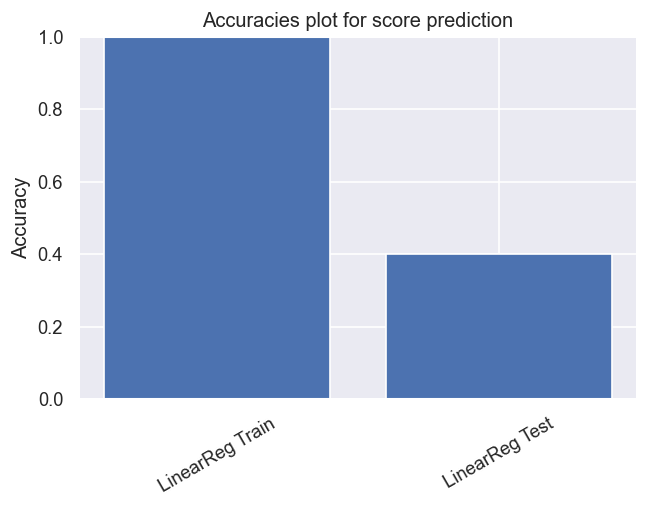

In [77]:
sns.set_theme()

def plot_bar(results_dict, title, ylabel):
    plt.bar(results_dict.keys(), results_dict.values())
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=30)
    plt.ylim((0,1))
    plt.show()

results_dict = {'LinearReg Train':train_acc, 'LinearReg Test':test_acc}
plot_bar(results_dict, "Accuracies plot for score prediction", "Accuracy")